Erro Quadrático Médio no Seno: 0.000632


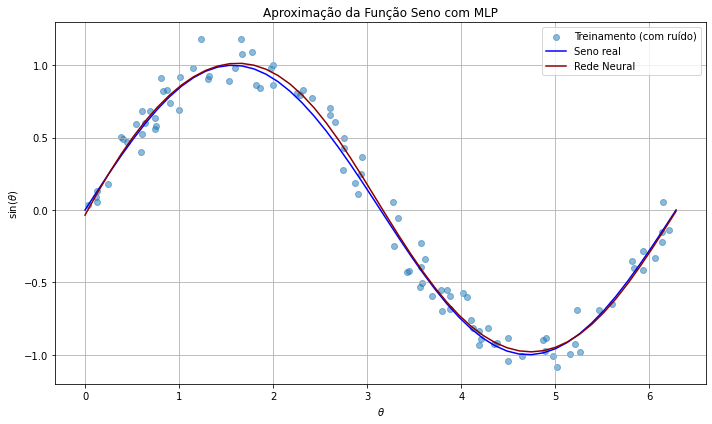

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

#função seno

# 1. Dados de Treinamento
np.random.seed(0)
n_amostras = 100
x_train = np.random.uniform(0, 2 * np.pi, n_amostras).reshape(-1, 1)
y_train = np.sin(x_train)

# Adicionando ruído aos dados
ruido = np.random.normal(0, 0.1, y_train.shape)
y_train_noisy = y_train + ruido

# 2. Modelo da Rede Neural
regressor = MLPRegressor(
    hidden_layer_sizes=(10, 10, 10),
    activation='tanh',
    solver='adam',
    max_iter=100000,
    random_state=0,
    learning_rate_init=1e-3,
    tol=1e-8
)

# Ajuste do modelo com y como vetor 1D
regressor.fit(x_train, y_train_noisy.ravel())

# 3. Dados de Teste
n_teste = 50
x_test = np.linspace(0, 2 * np.pi, n_teste).reshape(-1, 1)
y_true = np.sin(x_test)

# 4. Predição
y_pred = regressor.predict(x_test)

# 5. Avaliação
erro_medio = mean_squared_error(y_true, y_pred)
print(f"Erro Quadrático Médio no Seno: {erro_medio:.6f}")

# 6. Visualização
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train_noisy, label='Treinamento (com ruído)', alpha=0.5)
plt.plot(x_test, y_true, label='Seno real', color='blue')
plt.plot(x_test, y_pred, label='Rede Neural', color='darkred')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\sin(\theta)$')
plt.title('Aproximação da Função Seno com MLP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Erro Quadrático Médio na Tangente: 0.000381


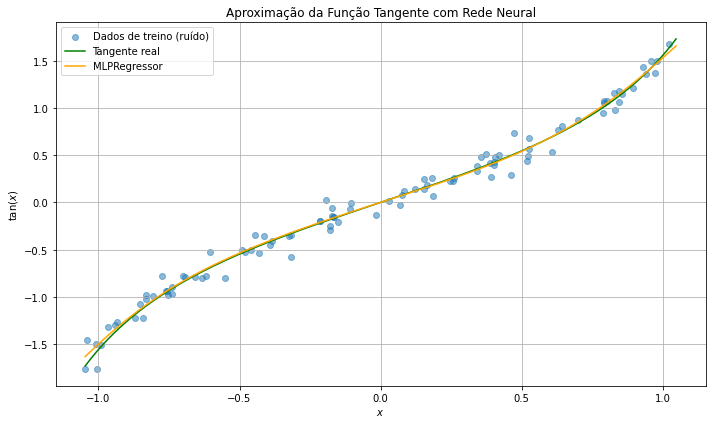

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

#função tangente

# 1. Geração dos Dados de Treinamento
np.random.seed(1)
n_amostras = 100
x_train = np.random.uniform(-np.pi / 3, np.pi / 3, n_amostras).reshape(-1, 1)
y_train = np.tan(x_train)

# Adicionando ruído aos dados
ruido = np.random.normal(0, 0.1, y_train.shape)
y_train_noisy = y_train + ruido

# 2. Modelo da Rede Neural
regressor = MLPRegressor(
    hidden_layer_sizes=(12, 12, 12),
    activation='tanh',
    solver='adam',
    max_iter=150000,
    random_state=1,
    learning_rate_init=0.001,
    tol=1e-7
)

# Correção: .ravel() transforma y de shape (n, 1) para (n,)
regressor.fit(x_train, y_train_noisy.ravel())

# 3. Dados de Teste
x_test = np.linspace(-np.pi / 3, np.pi / 3, 200).reshape(-1, 1)
y_true = np.tan(x_test)

# 4. Predição
y_pred = regressor.predict(x_test)

# 5. Avaliação
erro_medio = mean_squared_error(y_true, y_pred)
print(f"Erro Quadrático Médio na Tangente: {erro_medio:.6f}")

# 6. Visualização
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train_noisy, label='Dados de treino (ruído)', alpha=0.5)
plt.plot(x_test, y_true, label='Tangente real', color='green')
plt.plot(x_test, y_pred, label='MLPRegressor', color='orange')
plt.xlabel(r'$x$')
plt.ylabel(r'$\tan(x)$')
plt.title('Aproximação da Função Tangente com Rede Neural')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Erro Quadrático Médio - sync(x): 0.000057


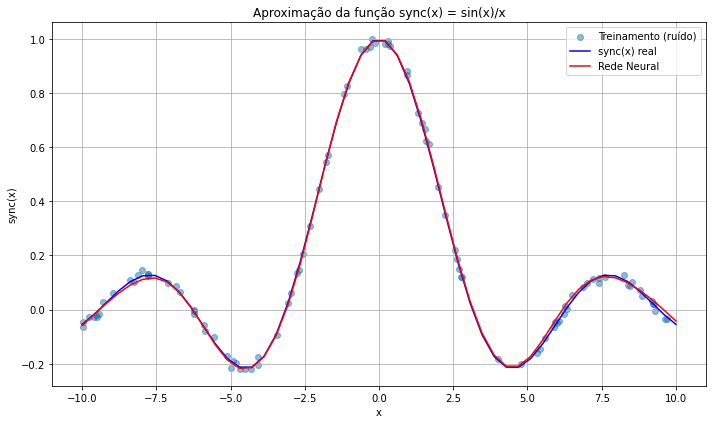

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

#função sync

# 1. Geração dos Dados de Treinamento
np.random.seed(5)
n_amostras = 100
x_train = np.random.uniform(-10, 10, n_amostras).reshape(-1, 1)

# Cuidado no ponto x=0 para evitar divisão por zero
y_train = np.sinc(x_train / np.pi)  # np.sinc já implementa sin(pi x)/(pi x)

# Adiciona ruído
ruido = np.random.normal(0, 0.01, y_train.shape)
y_train_noisy = y_train + ruido

# 2. Definição e Treinamento do Modelo
regressor = MLPRegressor(
    hidden_layer_sizes=(10, 10, 10),
    activation='tanh',
    solver='adam',
    max_iter=100000,
    random_state=5,
    learning_rate_init=0.001,
    tol=1e-8
)

regressor.fit(x_train, y_train_noisy.ravel())

# 3. Dados de Teste
x_test = np.linspace(-10, 10, 50).reshape(-1, 1)
y_true = np.sinc(x_test / np.pi)

# 4. Predição
y_pred = regressor.predict(x_test)

# 5. Avaliação
mse = mean_squared_error(y_true, y_pred)
print(f"Erro Quadrático Médio - sync(x): {mse:.6f}")

# 6. Visualização
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train_noisy, label='Treinamento (ruído)', alpha=0.5)
plt.plot(x_test, y_true, label='sync(x) real', color='blue')
plt.plot(x_test, y_pred, label='Rede Neural', color='red')
plt.xlabel('x')
plt.ylabel('sync(x)')
plt.title('Aproximação da função sync(x) = sin(x)/x')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Erro Quadrático Médio - Gaussiana: 0.000025


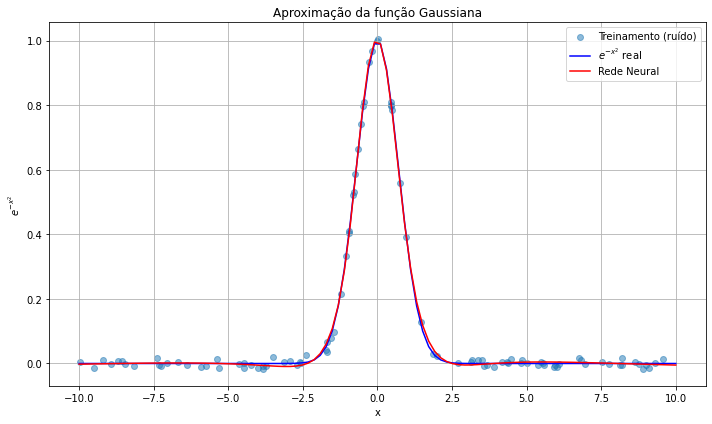

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

#função gaussiana

# 1. Geração dos Dados de Treinamento
np.random.seed(7)
n_amostras = 100
x_train = np.random.uniform(-10, 10, n_amostras).reshape(-1, 1)
y_train = np.exp(-x_train**2)

# Adiciona ruído
ruido = np.random.normal(0, 0.01, y_train.shape)
y_train_noisy = y_train + ruido

# 2. Definição e Treinamento do Modelo
regressor = MLPRegressor(
    hidden_layer_sizes=(10, 10, 10),
    activation='tanh',
    solver='adam',
    max_iter=100000,
    random_state=7,
    learning_rate_init=0.001,
    tol=1e-8
)

regressor.fit(x_train, y_train_noisy.ravel())

# 3. Dados de Teste
x_test = np.linspace(-10, 10, 100).reshape(-1, 1)
y_true = np.exp(-x_test**2)

# 4. Predição
y_pred = regressor.predict(x_test)

# 5. Avaliação
mse = mean_squared_error(y_true, y_pred)
print(f"Erro Quadrático Médio - Gaussiana: {mse:.6f}")

# 6. Visualização
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train_noisy, label='Treinamento (ruído)', alpha=0.5)
plt.plot(x_test, y_true, label=r'$e^{-x^2}$ real', color='blue')
plt.plot(x_test, y_pred, label='Rede Neural', color='red')
plt.xlabel('x')
plt.ylabel(r'$e^{-x^2}$')
plt.title('Aproximação da função Gaussiana')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Erro final: 0.001226


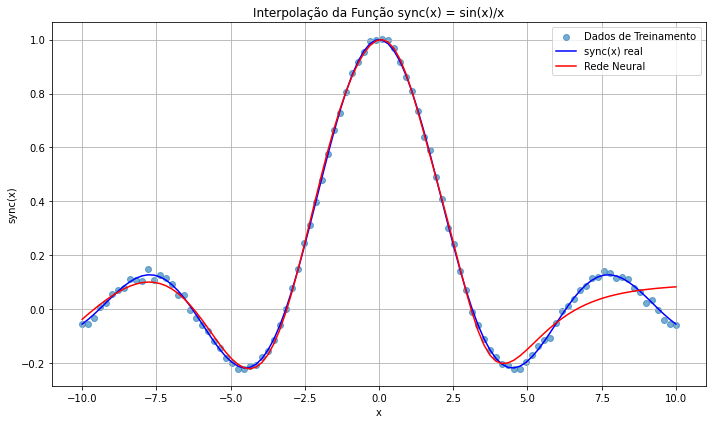

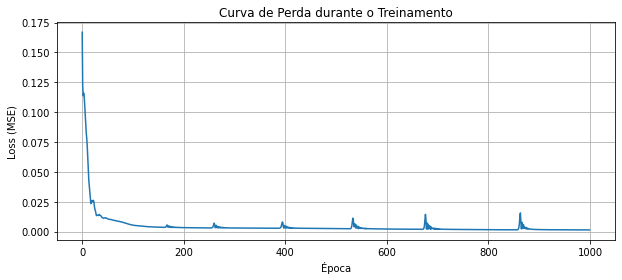

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

def escolher_funcao_ativacao(nome_funcao):
    if nome_funcao.lower() == 'relu':
        return nn.ReLU()
    elif nome_funcao.lower() == 'tanh':
        return nn.Tanh()
    elif nome_funcao.lower() == 'sigmoid':
        return nn.Sigmoid()
    else:
        raise ValueError(f"Função de ativação '{nome_funcao}' não suportada.")

class Net(nn.Module):
    def __init__(self, num_camadas, num_neuronios, funcao_ativacao):
        super(Net, self).__init__()
        layers = [nn.Linear(1, num_neuronios), funcao_ativacao]
        for _ in range(num_camadas - 1):
            layers.extend([nn.Linear(num_neuronios, num_neuronios), funcao_ativacao])
        layers.append(nn.Linear(num_neuronios, 1))
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

def gerar_dados_sync(num_pontos=100):
    x = np.linspace(-10, 10, num_pontos)
    # np.sinc normaliza internamente para pi*x, então ajustamos:
    y = np.sinc(x / np.pi)
    y += 0.01 * np.random.randn(num_pontos)  # ruído leve
    x = x.reshape(-1, 1).astype(np.float32)
    y = y.reshape(-1, 1).astype(np.float32)
    return torch.tensor(x), torch.tensor(y)

def treinar_modelo(modelo, x_treino, y_treino, epocas=1000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(modelo.parameters(), lr=lr)
    historico_perdas = []

    for epoca in range(epocas):
        modelo.train()
        outputs = modelo(x_treino)
        loss = criterion(outputs, y_treino)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        historico_perdas.append(loss.item())

    return historico_perdas

def interpolar_sync_pytorch(num_camadas, num_neuronios, nome_funcao_ativacao, num_epocas=1000):
    x_treino, y_treino = gerar_dados_sync()
    funcao_ativacao = escolher_funcao_ativacao(nome_funcao_ativacao)
    modelo = Net(num_camadas, num_neuronios, funcao_ativacao)
    historico_perdas = treinar_modelo(modelo, x_treino, y_treino, num_epocas)
    
    x_teste_np = np.linspace(-10, 10, 100).reshape(-1, 1).astype(np.float32)
    x_teste = torch.tensor(x_teste_np)
    modelo.eval()
    with torch.no_grad():
        y_pred = modelo(x_teste).numpy()
    y_verdadeiro = np.sinc(x_teste_np / np.pi)
    
    print(f"Erro final: {np.mean((y_verdadeiro - y_pred)**2):.6f}")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_treino.numpy(), y_treino.numpy(), label='Dados de Treinamento', alpha=0.6)
    plt.plot(x_teste_np, y_verdadeiro, label='sync(x) real', color='blue')
    plt.plot(x_teste_np, y_pred, label='Rede Neural', color='red')
    plt.xlabel('x')
    plt.ylabel('sync(x)')
    plt.title('Interpolação da Função sync(x) = sin(x)/x')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(historico_perdas)
    plt.xlabel('Época')
    plt.ylabel('Loss (MSE)')
    plt.title('Curva de Perda durante o Treinamento')
    plt.grid(True)
    plt.show()

# Executa a interpolação
interpolar_sync_pytorch(3, 10, 'tanh', 1000)


Erro final: 0.000009


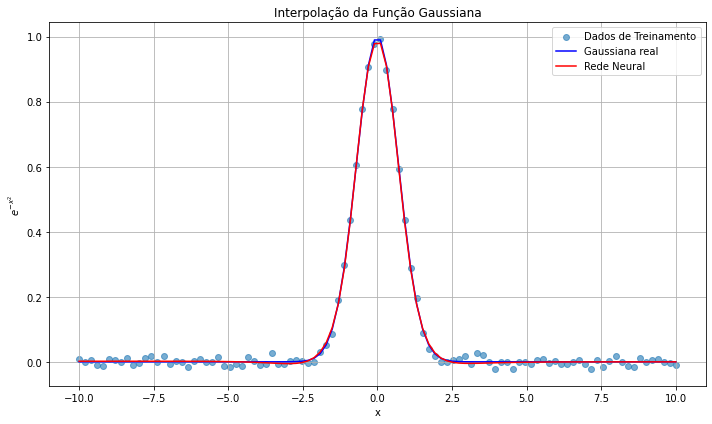

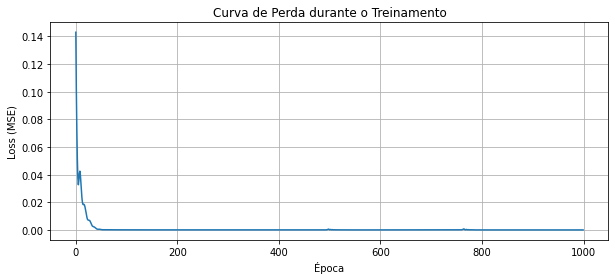

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

def escolher_funcao_ativacao(nome_funcao):
    if nome_funcao.lower() == 'relu':
        return nn.ReLU()
    elif nome_funcao.lower() == 'tanh':
        return nn.Tanh()
    elif nome_funcao.lower() == 'sigmoid':
        return nn.Sigmoid()
    else:
        raise ValueError(f"Função de ativação '{nome_funcao}' não suportada.")

class Net(nn.Module):
    def __init__(self, num_camadas, num_neuronios, funcao_ativacao):
        super(Net, self).__init__()
        layers = [nn.Linear(1, num_neuronios), funcao_ativacao]
        for _ in range(num_camadas - 1):
            layers.extend([nn.Linear(num_neuronios, num_neuronios), funcao_ativacao])
        layers.append(nn.Linear(num_neuronios, 1))
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

def gerar_dados_gaussiana(num_pontos=100):
    x = np.linspace(-10, 10, num_pontos)
    y = np.exp(-x**2)
    y += 0.01 * np.random.randn(num_pontos)  # ruído leve
    x = x.reshape(-1, 1).astype(np.float32)
    y = y.reshape(-1, 1).astype(np.float32)
    return torch.tensor(x), torch.tensor(y)

def treinar_modelo(modelo, x_treino, y_treino, epocas=1000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(modelo.parameters(), lr=lr)
    historico_perdas = []

    for epoca in range(epocas):
        modelo.train()
        outputs = modelo(x_treino)
        loss = criterion(outputs, y_treino)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        historico_perdas.append(loss.item())

    return historico_perdas

def interpolar_gaussiana_pytorch(num_camadas, num_neuronios, nome_funcao_ativacao, num_epocas=1000):
    x_treino, y_treino = gerar_dados_gaussiana()
    funcao_ativacao = escolher_funcao_ativacao(nome_funcao_ativacao)
    modelo = Net(num_camadas, num_neuronios, funcao_ativacao)
    historico_perdas = treinar_modelo(modelo, x_treino, y_treino, num_epocas)
    
    x_teste_np = np.linspace(-10, 10, 100).reshape(-1, 1).astype(np.float32)
    x_teste = torch.tensor(x_teste_np)
    modelo.eval()
    with torch.no_grad():
        y_pred = modelo(x_teste).numpy()
    y_verdadeiro = np.exp(-x_teste_np**2)
    
    print(f"Erro final: {np.mean((y_verdadeiro - y_pred)**2):.6f}")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_treino.numpy(), y_treino.numpy(), label='Dados de Treinamento', alpha=0.6)
    plt.plot(x_teste_np, y_verdadeiro, label='Gaussiana real', color='blue')
    plt.plot(x_teste_np, y_pred, label='Rede Neural', color='red')
    plt.xlabel('x')
    plt.ylabel(r'$e^{-x^2}$')
    plt.title('Interpolação da Função Gaussiana')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(historico_perdas)
    plt.xlabel('Época')
    plt.ylabel('Loss (MSE)')
    plt.title('Curva de Perda durante o Treinamento')
    plt.grid(True)
    plt.show()

# Executa a interpolação
interpolar_gaussiana_pytorch(3, 10, 'tanh', 1000)
